In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
cust_data=pd.read_csv('/content/customer_booking.csv' ,encoding='ISO-8859-1')
cust_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
cust_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,50001,50001,50001,50001,50001,50001,50001,50001,50001,50001,50001,50001,50001,50001
unique,10,3,4,471,336,25,8,800,105,3,3,3,22,3
top,1,Internet,RoundTrip,1,6,8,Mon,AKLKUL,Australia,1,0,0,8.83,0
freq,31352,44382,49497,685,7757,3165,8102,2680,17872,33439,35152,28643,14520,42522


In [ ]:
cust_data.shape

(50001, 14)

In [ ]:
cust_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
cust_data[13].value_counts()

,count
13,
0,42522
1,7478
booking_complete,1


In [ ]:
# This is highly unbalanced dataset as majority people have not booked the flight
from sklearn.preprocessing import LabelEncoder
print(cust_data.columns)



Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


In [42]:
categorical_cols = X.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')


In [48]:
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [45]:
X = cust_data.drop(columns='booking_complete')
Y = cust_data['booking_complete']

# Encode categorical columns before splitting
categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Then split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Accuracy: 0.8562


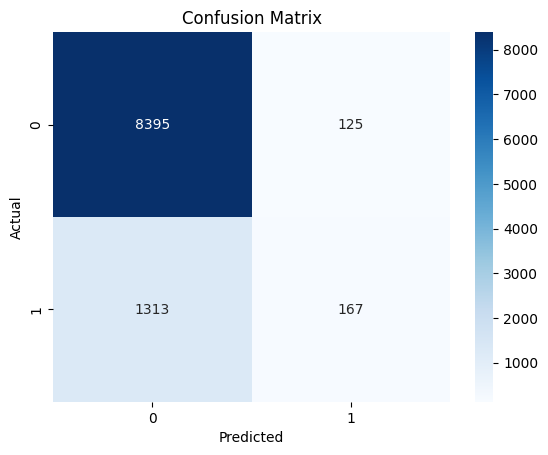

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model on training data
rf_model.fit(X_train, Y_train)

# Step 3: Predict on the test set
Y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))


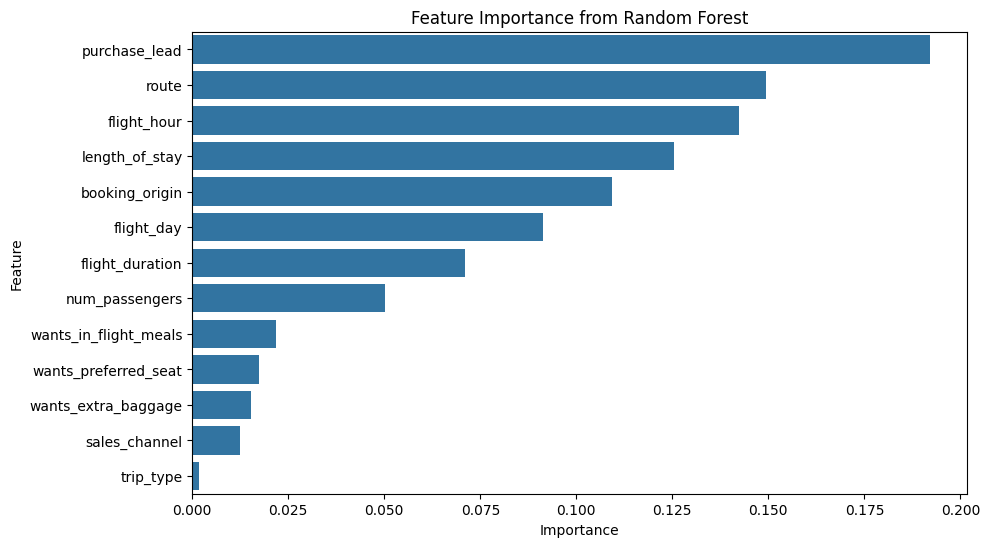

In [49]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance from Random Forest')
plt.show()
